# Выбранный набор данных включает в себя информацию о собеседованиях, проведенных с 2014 по 2016 год.

### В датасете используются категориальные переменные, разделенные на два типа : 
 - бинарные, значения которых "да" или "нет", отвечающие на вопросы: пришел?, сделал резюме?, дошло ли письмо на почту?
 - описывающие категории, например: сфера деятельности, месторождение, должность, у которых больше двух значений

### Основные цели работы: 
 - научиться оптимизировать данные
 - разобраться в применении моделей регрессии и классификации 

### Задача:
 - построить модели классификации для выбранных данных, выбрать из них лучшую и интерпретировать ее 

### 1) Оптимизация датасета

In [1]:
# Импорт модулей
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import warnings
warnings.simplefilter('ignore')
%load_ext autoreload
%autoreload 2

# Отображение графиков
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# Графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

# Увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# Чтение файла
df = pd.read_csv('Interview.csv')

In [2]:
df

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN
5,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 6,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Single,NaN,NaN,NaN,NaN,NaN
6,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 7,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Single,NaN,NaN,NaN,NaN,NaN
7,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 8,Female,Gurgaon,...,Yes,Yes,Yes,Yes,Single,NaN,NaN,NaN,NaN,NaN
8,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 9,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Single,NaN,NaN,NaN,NaN,NaN
9,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 10,Female,Gurgaon,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN


In [3]:
# Убираем неназванные столбцы
df=df.drop(df.columns[[ 23 , 24, 25, 26, 27]], axis=1)

In [4]:
print(df.shape)

(1234, 23)


In [5]:
# Убираем незополненную строчку
df = df.drop(df.index[[1233]])

In [6]:
print(df.shape)

(1233, 23)


In [7]:
df

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married
5,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 6,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
6,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 7,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
7,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 8,Female,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
8,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 9,Male,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
9,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 10,Female,Gurgaon,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single


In [8]:
# Для убодства просмотра
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [9]:
df

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married
5,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 6,Male,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
6,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 7,Male,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
7,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 8,Female,Gurgaon,Gurgaon,Gurgaon,Noida,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
8,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 9,Male,Gurgaon,Gurgaon,Gurgaon,Delhi /NCR,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
9,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 10,Female,Gurgaon,Gurgaon,Gurgaon,Delhi /NCR,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single


In [10]:
# Убираем ячейки без значений
df = df.dropna()
print(df.shape)

(984, 23)


In [11]:
df

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married
5,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 6,Male,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
6,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 7,Male,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
7,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 8,Female,Gurgaon,Gurgaon,Gurgaon,Noida,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
8,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 9,Male,Gurgaon,Gurgaon,Gurgaon,Delhi /NCR,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
9,13.02.2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 10,Female,Gurgaon,Gurgaon,Gurgaon,Delhi /NCR,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
10,19.06.2015,UST,IT Services,Bangalore,Dot Net,Routine,Scheduled Walkin,Candidate 11,Male,Bangalore,Bangalore,Bangalore,Cochin,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single


In [12]:
# Переименуем столбцы для удобства
df.columns = ['Date', 'Client', 'Industry', 'Location', 'Position', 'Skillset',
                        'Interview_Type', 'ID', 'Gender', 'Cand_Loc', 'Job_Loc', 'Venue',
                        'Native_Loc', 'Permission', 'Hope', 'Three_hour_call', 'Alt_phone',
                        'Resume_Printout', 'Clarify_Venue', 'Shared_Letter', 'Expected', 
                        'Attended', 'Martial_Status']

In [13]:
# Вывод уникальных значений
for c in df.columns:
    print(c)
    print(df[c].unique())

Date
['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '04/12/16'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15 Apr 16' '19 Apr 16' '20 Apr 16' '21-Apr -16'
 '22 -Apr -16' '25 – Apr-16' '25 Apr 16' '18 Apr 16' '11.5.16' '10.5.16'
 '11.05.16' '12.04.2017' '12.04.2018' '12.04.2019' '12.04.2020'
 '12.04.2022' '8.5.16' '7.5.16' '19.03.16' '24.05.2016' '05/11/2016'
 '26/05/2016' '10.05.2016' '28.08.2016 & 9.30 AM' '28.08.2016 & 09.30 AM'
 '28.8.2016 & 10.30 AM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2016' '21/04/16' '22.01.2016' '3.6.16' '09.01.2016' '21.4.15'
 '09-01-2016' '03.04.2015' '13/03/2015' '17/03/2015' '17.03.2015'
 '18.03.2014' '4.04.15' '16.04.2015' '17.04.2015' '9.04.2015' '05/02/15'
 '30.05.2016' '07.

In [14]:
print(df['Date'].unique())

['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '04/12/16'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15 Apr 16' '19 Apr 16' '20 Apr 16' '21-Apr -16'
 '22 -Apr -16' '25 – Apr-16' '25 Apr 16' '18 Apr 16' '11.5.16' '10.5.16'
 '11.05.16' '12.04.2017' '12.04.2018' '12.04.2019' '12.04.2020'
 '12.04.2022' '8.5.16' '7.5.16' '19.03.16' '24.05.2016' '05/11/2016'
 '26/05/2016' '10.05.2016' '28.08.2016 & 9.30 AM' '28.08.2016 & 09.30 AM'
 '28.8.2016 & 10.30 AM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2016' '21/04/16' '22.01.2016' '3.6.16' '09.01.2016' '21.4.15'
 '09-01-2016' '03.04.2015' '13/03/2015' '17/03/2015' '17.03.2015'
 '18.03.2014' '4.04.15' '16.04.2015' '17.04.2015' '9.04.2015' '05/02/15'
 '30.05.2016' '07.06.20

In [15]:
# Напишем функцию, которая приводит дату к одному формату
def clean_date(date):
    date = date.str.strip()
    date = date.str.split("&").str[0]
    date = date.str.replace('–', '/')
    date = date.str.replace('.', '/')
    date = date.str.replace('Apr', '04')
    date = date.str.replace('-', '/')
    date = date.str.replace(' ', '/')
    date = date.str.replace('//+', '/')
    date = date.str.replace('/1/', '/01/')
    date = date.str.replace('/16', '/2016')
    date = date.str.replace('/15', '/2015')
    return date

In [16]:
df['Date'] = clean_date(df['Date'])

In [17]:
df

,Date,Client,Industry,Location,Position,Skillset,Interview_Type,ID,Gender,Cand_Loc,Job_Loc,Venue,Native_Loc,Permission,Hope,Three_hour_call,Alt_phone,Resume_Printout,Clarify_Venue,Shared_Letter,Expected,Attended,Martial_Status
0,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
3,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13/02/2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married
5,13/02/2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 6,Male,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
6,13/02/2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 7,Male,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
7,13/02/2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 8,Female,Gurgaon,Gurgaon,Gurgaon,Noida,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
8,13/02/2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 9,Male,Gurgaon,Gurgaon,Gurgaon,Delhi /NCR,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
9,13/02/2015,Aon Hewitt,IT Services,Gurgaon,Selenium testing,Routine,Scheduled Walkin,Candidate 10,Female,Gurgaon,Gurgaon,Gurgaon,Delhi /NCR,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
10,19/06/2015,UST,IT Services,Bangalore,Dot Net,Routine,Scheduled Walkin,Candidate 11,Male,Bangalore,Bangalore,Bangalore,Cochin,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single


In [18]:
# Создадим новые столбцы с числом, месяцем и годом
df['year'] = df['Date'].str.split("/").str[2]
df['day'] = df['Date'].str.split("/").str[0]
df['month'] = df['Date'].str.split("/").str[1]





df['date'] = pd.to_datetime(pd.DataFrame({'year': df['year'],
                                            'month': df['month'],
                                            'day': df['day']}), format = '%Y-%m-%d')


df.head()
df = df.drop(['Date'], axis = 1)

In [19]:
# Начнем оптимизацию текстовых данных
# Выводим все значения столбцов и приводим повторяющиеся к одному виду
df['Client'].value_counts()

Standard Chartered Bank            714
Hospira                             61
Pfizer                              57
Aon Hewitt                          26
ANZ                                 22
Hewitt                              20
UST                                 18
Prodapt                             17
Flextronics                         13
Williams Lea                        11
Standard Chartered Bank Chennai     11
Astrazeneca                          6
Barclays                             5
Aon hewitt Gurgaon                   2
Woori Bank                           1
Name: Client, dtype: int64

In [20]:
# Для удобства переводим к нижнему регистру
df = pd.concat([df[c].astype(str).str.lower() for c in df.columns], axis = 1)
df = pd.concat([df[c].astype(str).str.strip() for c in df.columns], axis = 1)

In [21]:
df

,Client,Industry,Location,Position,Skillset,Interview_Type,ID,Gender,Cand_Loc,Job_Loc,Venue,Native_Loc,Permission,Hope,Three_hour_call,Alt_phone,Resume_Printout,Clarify_Venue,Shared_Letter,Expected,Attended,Martial_Status,year,day,month,date
0,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 1,male,chennai,hosur,hosur,hosur,yes,yes,yes,yes,yes,yes,yes,yes,no,single,2015,13,02,2015-02-13
1,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 2,male,chennai,bangalore,hosur,trichy,yes,yes,yes,yes,yes,yes,yes,yes,no,single,2015,13,02,2015-02-13
3,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 4,male,chennai,chennai,hosur,chennai,yes,yes,no,yes,no,yes,yes,uncertain,no,single,2015,13,02,2015-02-13
4,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 5,male,chennai,bangalore,hosur,chennai,yes,yes,yes,no,yes,yes,yes,uncertain,no,married,2015,13,02,2015-02-13
5,aon hewitt,it services,gurgaon,selenium testing,routine,scheduled walkin,candidate 6,male,gurgaon,gurgaon,gurgaon,gurgaon,yes,yes,yes,yes,yes,yes,yes,yes,yes,single,2015,13,02,2015-02-13
6,aon hewitt,it services,gurgaon,selenium testing,routine,scheduled walkin,candidate 7,male,gurgaon,gurgaon,gurgaon,gurgaon,yes,yes,yes,yes,yes,yes,yes,yes,yes,single,2015,13,02,2015-02-13
7,aon hewitt,it services,gurgaon,selenium testing,routine,scheduled walkin,candidate 8,female,gurgaon,gurgaon,gurgaon,noida,yes,yes,yes,yes,yes,yes,yes,yes,yes,single,2015,13,02,2015-02-13
8,aon hewitt,it services,gurgaon,selenium testing,routine,scheduled walkin,candidate 9,male,gurgaon,gurgaon,gurgaon,delhi /ncr,yes,yes,yes,yes,yes,yes,yes,yes,yes,single,2015,13,02,2015-02-13
9,aon hewitt,it services,gurgaon,selenium testing,routine,scheduled walkin,candidate 10,female,gurgaon,gurgaon,gurgaon,delhi /ncr,yes,yes,yes,yes,yes,yes,yes,yes,no,single,2015,13,02,2015-02-13
10,ust,it services,bangalore,dot net,routine,scheduled walkin,candidate 11,male,bangalore,bangalore,bangalore,cochin,yes,yes,yes,yes,yes,yes,yes,yes,yes,single,2015,19,06,2015-06-19


In [22]:
df['Client'].value_counts()

standard chartered bank            714
hospira                             61
pfizer                              57
aon hewitt                          26
anz                                 22
hewitt                              20
ust                                 18
prodapt                             17
flextronics                         13
standard chartered bank chennai     11
williams lea                        11
astrazeneca                          6
barclays                             5
aon hewitt gurgaon                   2
woori bank                           1
Name: Client, dtype: int64

In [23]:
# Заменяем повторяющиеся значения
df['Client'].replace(['standard chartered bank chennai', 'aon hewitt gurgaon', 'hewitt'], 
                              ['standard chartered bank', 'aon hewitt', 'aon hewitt'], inplace = True)

In [24]:
# Данные приведены к удобному виду
df['Client'].value_counts()

standard chartered bank    725
hospira                     61
pfizer                      57
aon hewitt                  48
anz                         22
ust                         18
prodapt                     17
flextronics                 13
williams lea                11
astrazeneca                  6
barclays                     5
woori bank                   1
Name: Client, dtype: int64

In [25]:
# Повторим проделанную операцию на все столбцы
df['Industry'].replace(['it products and services', 'it services'], 
                              ['it', 'it'], inplace = True)
df['Location'].replace(['- cochin-'], 
                              ['cochin'], inplace = True)
df['Cand_Loc'].replace(['- cochin-'], 
                              ['cochin'], inplace = True)
df['Job_Loc'].replace(['- cochin-'], 
                              ['cochin'], inplace = True)
df['Venue'].replace(['- cochin-'], 
                              ['cochin'], inplace = True)
df['Native_Loc'].replace(['- cochin-'], 
                              ['cochin'], inplace = True)
df['Permission'].replace(['na', 'not yet', 'yet to confirm'], 
                              ['NaN', 'no', 'no'], inplace = True)
df['Hope'].replace(['na', 'not sure', 'cant say'], 
                              ['NaN', 'unsure', 'unsure'], inplace = True)
df['Three_hour_call'].replace(['na', 'no dont'], 
                              ['NaN', 'no'], inplace = True)
df['Alt_phone'].replace(['na', 'no i have only thi number'], 
                              ['NaN', 'no'], inplace = True)
df['Resume_Printout'].replace(['na', 'not yet', 'no- will take it soon'], 
                              ['NaN', 'no', 'no'], inplace = True)
df['Clarify_Venue'].replace(['na', 'no- i need to check'], 
                              ['NaN', 'no'], inplace = True)
df['Shared_Letter'].replace(['na', 'not sure', 'need to check', 'not yet', 'yet to check',
                                       'havent checked'],
                                      ['NaN', 'unsure', 'unsure', 'unsure', 'unsure', 'unsure'], inplace = True)
df['Expected'].replace(['na', '11:00 am', '10.30 am', 'uncertain'], 
                              ['NaN', 'yes', 'yes', 'unsure'], inplace = True)
df['Attended'].replace(['yes', 'no'],
                                 [1, 0], inplace = True)

In [26]:
df

,Client,Industry,Location,Position,Skillset,Interview_Type,ID,Gender,Cand_Loc,Job_Loc,Venue,Native_Loc,Permission,Hope,Three_hour_call,Alt_phone,Resume_Printout,Clarify_Venue,Shared_Letter,Expected,Attended,Martial_Status,year,day,month,date
0,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 1,male,chennai,hosur,hosur,hosur,yes,yes,yes,yes,yes,yes,yes,yes,0,single,2015,13,02,2015-02-13
1,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 2,male,chennai,bangalore,hosur,trichy,yes,yes,yes,yes,yes,yes,yes,yes,0,single,2015,13,02,2015-02-13
3,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 4,male,chennai,chennai,hosur,chennai,yes,yes,no,yes,no,yes,yes,unsure,0,single,2015,13,02,2015-02-13
4,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 5,male,chennai,bangalore,hosur,chennai,yes,yes,yes,no,yes,yes,yes,unsure,0,married,2015,13,02,2015-02-13
5,aon hewitt,it,gurgaon,selenium testing,routine,scheduled walkin,candidate 6,male,gurgaon,gurgaon,gurgaon,gurgaon,yes,yes,yes,yes,yes,yes,yes,yes,1,single,2015,13,02,2015-02-13
6,aon hewitt,it,gurgaon,selenium testing,routine,scheduled walkin,candidate 7,male,gurgaon,gurgaon,gurgaon,gurgaon,yes,yes,yes,yes,yes,yes,yes,yes,1,single,2015,13,02,2015-02-13
7,aon hewitt,it,gurgaon,selenium testing,routine,scheduled walkin,candidate 8,female,gurgaon,gurgaon,gurgaon,noida,yes,yes,yes,yes,yes,yes,yes,yes,1,single,2015,13,02,2015-02-13
8,aon hewitt,it,gurgaon,selenium testing,routine,scheduled walkin,candidate 9,male,gurgaon,gurgaon,gurgaon,delhi /ncr,yes,yes,yes,yes,yes,yes,yes,yes,1,single,2015,13,02,2015-02-13
9,aon hewitt,it,gurgaon,selenium testing,routine,scheduled walkin,candidate 10,female,gurgaon,gurgaon,gurgaon,delhi /ncr,yes,yes,yes,yes,yes,yes,yes,yes,0,single,2015,13,02,2015-02-13
10,ust,it,bangalore,dot net,routine,scheduled walkin,candidate 11,male,bangalore,bangalore,bangalore,cochin,yes,yes,yes,yes,yes,yes,yes,yes,1,single,2015,19,06,2015-06-19


In [27]:
# Проверка
df['Location'].value_counts()

chennai      689
bangalore    214
gurgaon       32
hyderabad     24
noida         14
cochin         9
delhi          1
gurgaonr       1
Name: Location, dtype: int64

In [28]:
# Проверка
df['Industry'].value_counts()

bfsi               753
pharmaceuticals    124
it                  77
telecom             17
electronics         13
Name: Industry, dtype: int64

In [29]:
# Проверка
df['Attended'].value_counts()

1    676
0    308
Name: Attended, dtype: int64

In [30]:
# Смотрим еще раз
for c in df.columns:
    print(c)
    print(df[c].unique())

Client
['hospira' 'aon hewitt' 'ust' 'standard chartered bank' 'anz' 'pfizer'
 'astrazeneca' 'flextronics' 'prodapt' 'williams lea' 'barclays'
 'woori bank']
Industry
['pharmaceuticals' 'it' 'bfsi' 'electronics' 'telecom']
Location
['chennai' 'gurgaon' 'bangalore' 'hyderabad' 'gurgaonr' 'delhi' 'cochin'
 'noida']
Position
['production- sterile' 'selenium testing' 'dot net' 'aml' 'trade finance'
 'routine' 'niche']
Skillset
['routine' 'oracle' 'accounting operations' 'banking operations' 'fresher'
 'aml/kyc/cdd' 'cdd kyc' 'biosimiliars' 'ra label' 'ra publishing' 'emea'
 'generic drugs – ra' 'regulatory' 'analytical r & d' 'analytical r&d'
 'senior software engineer-mednet' 'tech lead-mednet' 'tech lead- mednet'
 'technical lead' 'tl' 'sr automation testing' 'senior analyst'
 'production' 'core java' 'java j2ee' 'oracle plsql' 'java,sql'
 'automation testing java' 'submission management' 'biosimillar'
 'publishing' 'global labelling' 'als testing' 'java developer'
 'lending and liabilit

In [31]:
# Исправляем менее очевидные неточности
df['Interview_Type'].replace(['scheduled', 'scheduled walk in', 'walkin'],
                                       ['scheduled walkin', 'scheduled walkin', 'scheduled walkin'], inplace = True)

In [32]:
df['Interview_Type'].value_counts()

scheduled walkin    984
Name: Interview_Type, dtype: int64

In [33]:
# Данные приведены с 2014 по 2016 год
df = df[df['date'] < '2017-01-01']

In [34]:
# На данном этапе данные более менее оптимизированы, для последующего анализа будем создавать датафреймы из этого
df

,Client,Industry,Location,Position,Skillset,Interview_Type,ID,Gender,Cand_Loc,Job_Loc,Venue,Native_Loc,Permission,Hope,Three_hour_call,Alt_phone,Resume_Printout,Clarify_Venue,Shared_Letter,Expected,Attended,Martial_Status,year,day,month,date
0,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 1,male,chennai,hosur,hosur,hosur,yes,yes,yes,yes,yes,yes,yes,yes,0,single,2015,13,02,2015-02-13
1,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 2,male,chennai,bangalore,hosur,trichy,yes,yes,yes,yes,yes,yes,yes,yes,0,single,2015,13,02,2015-02-13
3,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 4,male,chennai,chennai,hosur,chennai,yes,yes,no,yes,no,yes,yes,unsure,0,single,2015,13,02,2015-02-13
4,hospira,pharmaceuticals,chennai,production- sterile,routine,scheduled walkin,candidate 5,male,chennai,bangalore,hosur,chennai,yes,yes,yes,no,yes,yes,yes,unsure,0,married,2015,13,02,2015-02-13
5,aon hewitt,it,gurgaon,selenium testing,routine,scheduled walkin,candidate 6,male,gurgaon,gurgaon,gurgaon,gurgaon,yes,yes,yes,yes,yes,yes,yes,yes,1,single,2015,13,02,2015-02-13
6,aon hewitt,it,gurgaon,selenium testing,routine,scheduled walkin,candidate 7,male,gurgaon,gurgaon,gurgaon,gurgaon,yes,yes,yes,yes,yes,yes,yes,yes,1,single,2015,13,02,2015-02-13
7,aon hewitt,it,gurgaon,selenium testing,routine,scheduled walkin,candidate 8,female,gurgaon,gurgaon,gurgaon,noida,yes,yes,yes,yes,yes,yes,yes,yes,1,single,2015,13,02,2015-02-13
8,aon hewitt,it,gurgaon,selenium testing,routine,scheduled walkin,candidate 9,male,gurgaon,gurgaon,gurgaon,delhi /ncr,yes,yes,yes,yes,yes,yes,yes,yes,1,single,2015,13,02,2015-02-13
9,aon hewitt,it,gurgaon,selenium testing,routine,scheduled walkin,candidate 10,female,gurgaon,gurgaon,gurgaon,delhi /ncr,yes,yes,yes,yes,yes,yes,yes,yes,0,single,2015,13,02,2015-02-13
10,ust,it,bangalore,dot net,routine,scheduled walkin,candidate 11,male,bangalore,bangalore,bangalore,cochin,yes,yes,yes,yes,yes,yes,yes,yes,1,single,2015,19,06,2015-06-19


Для визуального анализа категориальных переменных построим диаграммы countplot

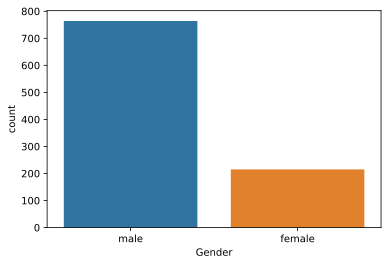

In [35]:
# Построим диаграммы
# Видно, что на собеседование пришло больше мужчин, чем женщин
sns.countplot(df.Gender)
plt.show()

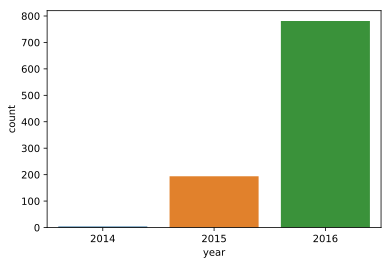

In [36]:
# В 2016 году пришло гораздо больше людей, чем в 2014
sns.countplot(df.year)
plt.show()

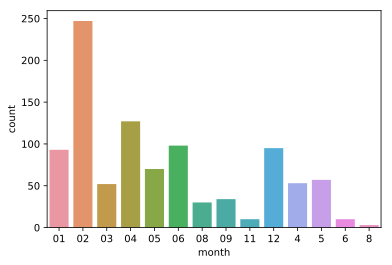

In [37]:
# Пиковый месяц февраль. Более того, в начале года пришло гораздо больше
sns.countplot(df.month)
plt.show()

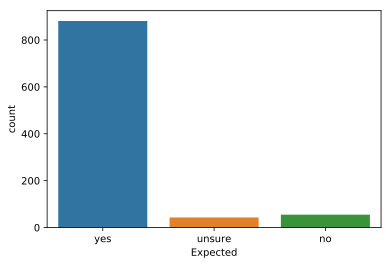

In [38]:
sns.countplot(df.Expected)
plt.show()

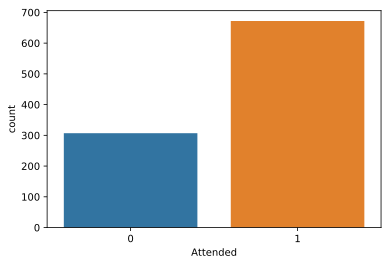

In [39]:
# Видно, что ожидания не совсем совпали с реальностю
sns.countplot(df.Attended)
plt.show()

In [40]:
df["Expected"].value_counts()

yes       881
no         55
unsure     43
Name: Expected, dtype: int64

In [41]:
df["Attended"].value_counts()

1    672
0    307
Name: Attended, dtype: int64

In [42]:
# Выведем один из столбцов. При замене изначальных значений "na" превратили в "NaN". Это не удалить через dropna(), так как 
# это строка. Поэтому делаем вручную
df["Hope"].value_counts()

yes       948
NaN        19
unsure      6
no          6
Name: Hope, dtype: int64

In [43]:
# Метод не очень красивый, зато рабочий
# В конце кода создаем бинарный dataframe для работы с категориями yes|no
b1 = df[df['Permission'] != 'NaN']
b2 = b1[b1['Hope'] != 'NaN']
b3 = b2[b2['Three_hour_call'] != 'NaN']
b4 = b3[b3['Alt_phone'] != 'NaN']
b5 = b4[b4['Alt_phone'] != 'NaN']
b6 = b5[b5['Resume_Printout'] != 'NaN']
b7 = b6[b6['Clarify_Venue'] != 'NaN']
drop_df = b7[b7['Shared_Letter'] != 'NaN']
# ID не несет никакой конкретной информации, Skillset содержит много разных и сложных данных, пока удалим 
drop_df = drop_df.drop(['Skillset', 'ID'], axis = 1) 

c1 = drop_df[df['Permission'] != 'unsure']
c2 = c1[c1['Hope'] != 'unsure']
c3 = c2[c2['Three_hour_call'] != 'unsure']
c4 = c3[c3['Alt_phone'] != 'unsure']
c5 = c4[c4['Alt_phone'] != 'unsure']
c6 = c5[c5['Resume_Printout'] != 'unsure']
c7 = c6[c6['Clarify_Venue'] != 'unsure']
c8 = c7[c7['Expected'] != 'unsure']

bin_df = c8[c8['Shared_Letter'] != 'unsure']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [44]:
# Смотрим, сколько "чистых" значений осталось
print(bin_df.shape)


(907, 24)


In [45]:
for c in bin_df.columns:
    print(c)
    print(bin_df[c].unique())

Client
['hospira' 'aon hewitt' 'ust' 'standard chartered bank' 'anz' 'pfizer'
 'astrazeneca' 'flextronics' 'prodapt' 'williams lea' 'barclays'
 'woori bank']
Industry
['pharmaceuticals' 'it' 'bfsi' 'electronics' 'telecom']
Location
['chennai' 'gurgaon' 'bangalore' 'hyderabad' 'gurgaonr' 'delhi' 'cochin'
 'noida']
Position
['production- sterile' 'selenium testing' 'dot net' 'aml' 'trade finance'
 'routine' 'niche']
Interview_Type
['scheduled walkin']
Gender
['male' 'female']
Cand_Loc
['chennai' 'gurgaon' 'bangalore' 'hyderabad' 'delhi' 'cochin' 'noida']
Job_Loc
['hosur' 'bangalore' 'gurgaon' 'chennai' 'visakapatinam' 'cochin' 'noida']
Venue
['hosur' 'gurgaon' 'bangalore' 'chennai' 'hyderabad' 'cochin' 'noida']
Native_Loc
['hosur' 'trichy' 'gurgaon' 'noida' 'delhi /ncr' 'cochin' 'bangalore'
 'trivandrum' 'chennai' 'salem' 'tanjore' 'coimbatore' 'hyderabad'
 'mumbai' 'pune' 'kolkata' 'panjim' 'allahabad' 'cuttack' 'visakapatinam'
 'ahmedabad' 'kurnool' 'vijayawada' 'vellore' 'pondicherry'

In [46]:
# Заменим категориальные переменные на числовые, избавляемся от Y-m-d из за проблем с конвертированием
digit_df = bin_df.drop(['date'], axis = 1)

In [47]:
# Переводим данные в цифру
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for name in digit_df.columns:
    digit_df[name] = encoder.fit_transform(digit_df[name])

# Выводы по 1 части

- удалены пустые значения
- исправлены неточности данных
- убраны лишние данные
- строковые данные изменены на целочисленные

In [48]:
 digit_df

,Client,Industry,Location,Position,Interview_Type,Gender,Cand_Loc,Job_Loc,Venue,Native_Loc,Permission,Hope,Three_hour_call,Alt_phone,Resume_Printout,Clarify_Venue,Shared_Letter,Expected,Attended,Martial_Status,year,day,month
0,5,3,1,3,0,1,1,4,4,14,1,1,1,1,1,1,1,1,0,1,1,9,1
1,5,3,1,3,0,1,1,0,4,30,1,1,1,1,1,1,1,1,0,1,1,9,1
5,1,2,4,5,0,1,4,3,3,12,1,1,1,1,1,1,1,1,1,1,1,9,1
6,1,2,4,5,0,1,4,3,3,12,1,1,1,1,1,1,1,1,1,1,1,9,1
7,1,2,4,5,0,0,4,3,3,23,1,1,1,1,1,1,1,1,1,1,1,9,1
8,1,2,4,5,0,1,4,3,3,11,1,1,1,1,1,1,1,1,1,1,1,9,1
9,1,2,4,5,0,0,4,3,3,11,1,1,1,1,1,1,1,1,0,1,1,9,1
10,9,2,0,1,0,1,0,0,0,7,1,1,1,1,1,1,1,1,1,1,1,15,5
12,9,2,0,1,0,1,0,0,0,3,1,1,1,1,1,1,1,1,1,1,1,15,5
14,9,2,0,1,0,1,0,0,0,7,1,1,1,1,1,1,1,1,1,1,1,15,5


### 2) Разделение на выборки,построение моделей

Рассчитаем критерий χ2 Пирсона для наших данных

In [49]:
import scipy.stats as st
names = ['Client', 'Industry', 'Location', 'Position', 'Interview_Type',
       'Gender', 'Cand_Loc', 'Job_Loc', 'Venue', 'Native_Loc', 'Permission',
       'Hope', 'Three_hour_call', 'Alt_phone', 'Resume_Printout',
       'Clarify_Venue', 'Shared_Letter', 'Expected','Martial_Status', 'year', 'day', 'month']
alpha = 0.05
y = digit_df['Attended']
columns = []
print('Признаки, зависимые с предсказываемым признаком')
for name in names:
    x = df[name]
    table = pd.crosstab(x,y).values
    chi2, prob, _, expected = st.chi2_contingency(table)
    if prob < alpha:
        columns.append(name)
        print("for '{}' p-value: {}".format(name, prob.round(2)))

Признаки, зависимые с предсказываемым признаком
for 'Client' p-value: 0.0
for 'Industry' p-value: 0.04
for 'Position' p-value: 0.0
for 'Venue' p-value: 0.01
for 'Permission' p-value: 0.0
for 'Hope' p-value: 0.01
for 'Alt_phone' p-value: 0.0
for 'Resume_Printout' p-value: 0.0
for 'Clarify_Venue' p-value: 0.0
for 'Shared_Letter' p-value: 0.0
for 'Expected' p-value: 0.0
for 'year' p-value: 0.02
for 'day' p-value: 0.01


В итоге получили, что только часть данных является значимой для для определения посещения интервью (Attended)

In [50]:
# Разделение на тестовую и обучающую выборку
from sklearn.model_selection import train_test_split  
X, y = digit_df.drop('Attended', 1), digit_df['Attended'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 28, stratify = y)

In [51]:
# Функция построения ROC кривых для сравнения моделей
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import  cross_val_score
def show_performance_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

    idx = np.min(np.where(tpr > 0.95)) 

    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")

    return

Далее производится построение различных моделей классификации (Логистическая регрессия, дерево, Classifier).
В качетсве сравнения моделей предлагается строить ROC-кривые. Качество классификатора определяется показателем AUC (площадь под ROC-кривой)


### LogisticRegression

 Для LogisticRegression подобраны оптимальные значения показателя регуляризации и штрафа. 

(0.7454545454545455, 0.7518248175182481)

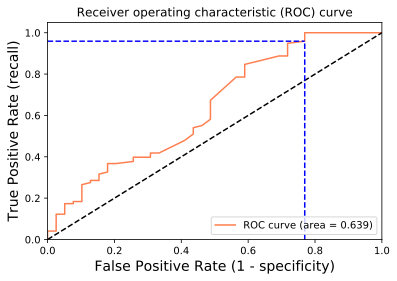

In [52]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=5, penalty='l1')
show_performance_model(log, X_train, y_train, X_test, y_test )
log.score(X_train, y_train), log.score(X_test, y_test)

### GaussianNB

 Построена модель Байесовского классификатора. Отметим ее монотонностьпо сравнению с другими

(0.7402597402597403, 0.7737226277372263)

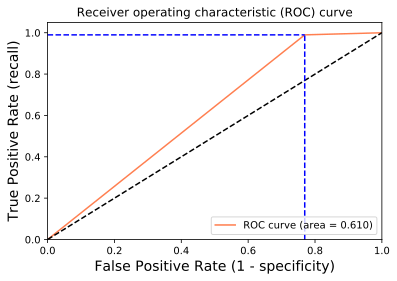

In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
show_performance_model(gnb, X_train, y_train, X_test, y_test )
gnb.score(X_train, y_train), gnb.score(X_test, y_test)

## Ансамбли
### DecisionTreeClassifier

(0.8181818181818182, 0.656934306569343)

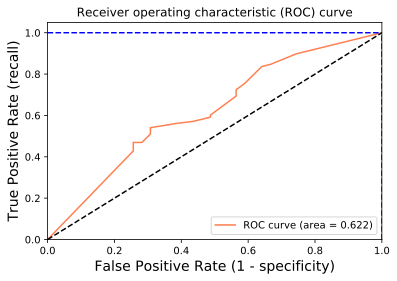

In [54]:
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier(random_state=28)
show_performance_model(dectree, X_train, y_train, X_test, y_test )
dectree.score(X_train, y_train), dectree.score(X_test, y_test)

Модель DecisionTreeClassifier оказалась переобучена 

In [55]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Загружаем датасет
data = digit_df

# Задаем выборки
X = X_train

# target vector
y = y_train

labels = names

dectree2=DecisionTreeClassifier(max_depth = 3)
dectree2.fit(X_train, y_train)
graph = Source(tree.export_graphviz(dectree, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))

graph2 = Source(tree.export_graphviz(dectree2, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))

Для примера построили небольшое дерево. Наиболее удобными для построения переменными оказались Expected, Position, day, Industry

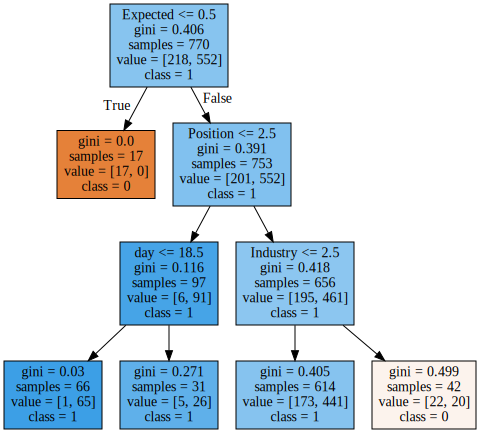

In [56]:
display(SVG(graph2.pipe(format='svg')))

### BaggingClassifier

(0.8064935064935065, 0.6934306569343066)

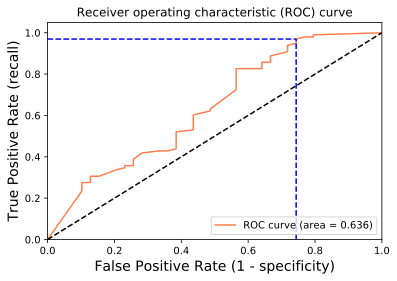

In [57]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(random_state=28)
show_performance_model(bag, X_train, y_train, X_test, y_test )
bag.score(X_train, y_train), bag.score(X_test, y_test)

Несмотря на то, что значение AUC довольно высокое, модель оказалась переобученной

### RandomForestClassifier

(0.812987012987013, 0.7153284671532847)

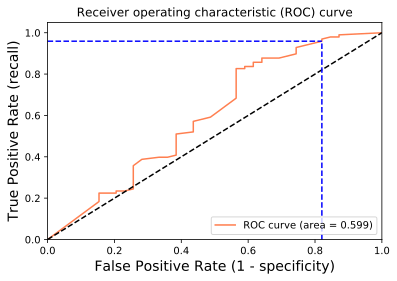

In [58]:
from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier(random_state=28)
show_performance_model(randomf, X_train, y_train, X_test, y_test )
randomf.score(X_train, y_train), randomf.score(X_test, y_test)

Значение AUC оказалось ниже, чем у других, более того, модель переобучена

###  ExtraTreesClassifier

(0.8181818181818182, 0.6642335766423357)

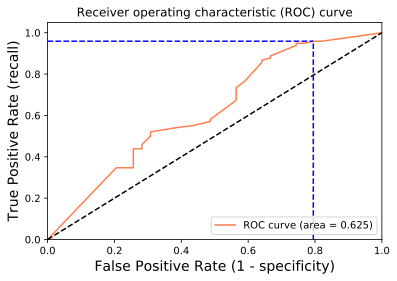

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier(random_state=28)
show_performance_model(ET, X_train, y_train, X_test, y_test )
ET.score(X_train, y_train), ET.score(X_test, y_test)

Модель также переобучена

(0.7831168831168831, 0.7591240875912408)

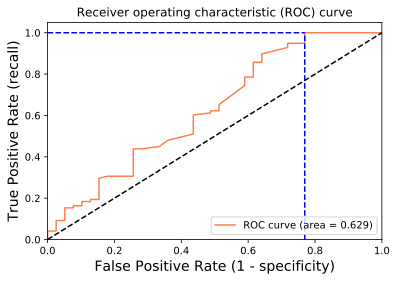

In [60]:
from sklearn.ensemble import VotingClassifier
logreg = LogisticRegression()
logreg2 = LogisticRegression(C=4)
tree = DecisionTreeClassifier()
modelVote = VotingClassifier(estimators=[('lr', logreg), ('dt', tree), ('lrreg', logreg2)], voting='soft')
show_performance_model(modelVote, X_train, y_train, X_test, y_test )
modelVote.score(X_train, y_train), modelVote.score(X_test, y_test)

### GradientBoostingClassifier

(0.7649350649350649, 0.7591240875912408)

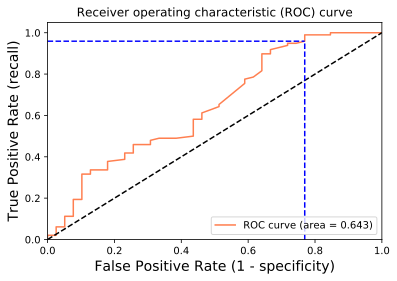

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(random_state=28)
show_performance_model(gb, X_train, y_train, X_test, y_test )
gb.score(X_train, y_train), gb.score(X_test, y_test)

У данной модели минимальна разница в значении обучающей и тестовой выборки, а также хороший показатель AUC

### AdaBoostClassifier 

(0.7597402597402597, 0.7664233576642335)

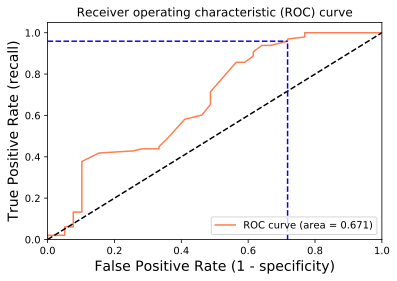

In [62]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=28)
show_performance_model(adaboost, X_train, y_train, X_test, y_test )
adaboost.score(X_train, y_train), adaboost.score(X_test, y_test)

Наибольшее значение AUC, отличный показатель score.

# Выводы по 2 части

Расситан критерий χ2 Пирсона, 
построены ROC кривые для нескольких моделей и рассчитаны точности предсказания обучающих и тестовых выборок:
- большинство ансамблей оказались переобучены
- наименее подходящая в данном случае модель - RandomForestClassifier
- наиболее подходящая модель - AdaBoostClassifier

# 3) Интерпретация одной из моделей

Для интерпретации возьмеме наилучшую модель из 2 пункта - AdaBoostClassifier

### Определим значимость переменных 

In [63]:
import eli5
feat_imp_tree = eli5.explain_weights_df(adaboost, feature_names=names[0:22])
feat_imp_tree

,feature,weight,std
0,Client,0.24,0.427083
1,Native_Loc,0.24,0.427083
2,day,0.14,0.346987
3,Venue,0.08,0.271293
4,Position,0.06,0.237487
5,Cand_Loc,0.06,0.237487
6,month,0.06,0.237487
7,Industry,0.04,0.195959
8,Expected,0.02,0.140000
9,Gender,0.02,0.140000


In [64]:
# Для другой модели 
eli5.explain_weights_df(gb, feature_names=names[0:22])

,feature,weight,std
0,Native_Loc,0.248726,0.230762
1,Industry,0.101235,0.153081
2,day,0.100991,0.166496
3,Expected,0.091442,0.162989
4,month,0.075054,0.147554
5,Client,0.073808,0.133655
6,Permission,0.054297,0.131005
7,Gender,0.052201,0.144608
8,Position,0.047610,0.094324
9,Venue,0.045927,0.133431


Как видно, для разных моделей разная значимость переменных

### Используем  Permutation Importance

In [65]:
from eli5.sklearn import PermutationImportance
permET = PermutationImportance(ET).fit(X_test, y_test)
eli5.explain_weights_df(permET, feature_names=names[0:22])

,feature,weight,std
0,Expected,0.020438,0.027076
1,Permission,0.017518,0.015723
2,Gender,0.005839,0.020333
3,Shared_Letter,0.005839,0.005462
4,Resume_Printout,0.002920,0.003576
5,Clarify_Venue,0.000000,0.000000
6,Alt_phone,0.000000,0.000000
7,Three_hour_call,0.000000,0.000000
8,Hope,0.000000,0.000000
9,Interview_Type,0.000000,0.000000


In [66]:
permAB = PermutationImportance(adaboost).fit(X_test, y_test)
eli5.show_weights(permAB, feature_names=names[0:22])

Weight,Feature
0.0380 ± 0.0396,Expected
0.0277 ± 0.0283,Industry
0.0263 ± 0.0271,Permission
0.0248 ± 0.0198,Position
0.0058 ± 0.0058,year
0.0044 ± 0.0072,Native_Loc
0.0044 ± 0.0286,Venue
0.0015 ± 0.0109,Cand_Loc
0 ± 0.0000,Location
0 ± 0.0000,Martial_Status


Как видно, использование Permutation Importance выводит другие переменные в качестве значимых и определяет те, которые влияют отрицательно

### Визуализация

In [67]:
from pycebox.ice import ice, ice_plot
X_train_df = pd.DataFrame(X_train, columns=names[0:22])

In [68]:
def predict_new1(X):
    return adaboost.predict_proba(X)[:,1]

BMIbag = ice(data=X_train_df, column='Expected', 
                   predict=predict_new1)
BMIbag2 = ice(data=X_train_df, column='day', 
                   predict=predict_new1)


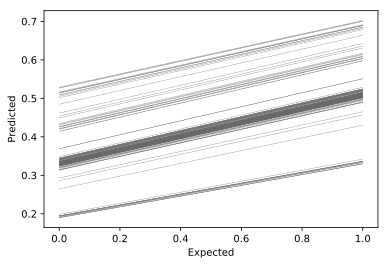

In [69]:
ice_plot(BMIbag, c='dimgray', linewidth=0.3)
plt.ylabel('Predicted')
plt.xlabel('Expected');

Полученный график для AdaBoostClassifier показывает, что каким бы ни был expected, predicted будет записеть от этой переменной линейно.

# Выводы

В ходе выполнения данной работы освоена работа с pandas, оптимизированы данные для их дальнейших исследований. 

Более того, применились различные модели классификации. Они были сравнены по точности предсказания и значению AUC. Наиболее подходящей моделей оказалась AdaBoostClassifier. 

В дальнейшем эта модель рассматривалась с точки зрения наиболее "весомых" переменных. Оказалось, что у разных моделей разная значимость переменных. Кроме этого, использование Permutation Importance подтвердило значимость прежних переменных. Стоит отметить, что "важные" переменные в целом совпали с теми переменными, которые удовлетворили критерию Пирсона. 

Построен график зависимости переменной Expected на прогноз.

Наиболее важными для определения посещаемости переменныеми оказались:

- Expected: ожидание компанией прихода на интервью
- Industry: сфера деятельности компании
- Client: сама компания